In [32]:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
import passwords
from passwords import *

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ny.gov", API_TOKEN)

# Define the query parameters
station_complex = '8 St-NYU (R,W)'
start_date = '2024-04-01'
end_date = '2024-06-30'

# Query to filter data for the specified station and date range
query = f"station_complex='{station_complex}' AND transit_timestamp >= '{start_date}' AND transit_timestamp <= '{end_date}'"

# Fetch the filtered data with a limit of 50,000
results = client.get("wujg-7c2s", where=query, limit=50000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

# Convert the transit_timestamp to datetime
results_df['transit_timestamp'] = pd.to_datetime(results_df['transit_timestamp'])

# Sort the DataFrame by transit_timestamp
results_df = results_df.sort_values(by='transit_timestamp')

# Add a new column for the row number
results_df['row_number'] = range(1, len(results_df) + 1)

# Convert ridership to numeric (in case it's not)
results_df['ridership'] = pd.to_numeric(results_df['ridership'], errors='coerce')

# Sum the ridership
total_ridership = results_df['ridership'].sum()

# Count the number of occurrences
occurrences_count = results_df.shape[0]

print(f"Number of occurrences from April to the end of June: {occurrences_count}")
print(f"Total ridership from April to the end of June: {total_ridership}")

# Display the table of all occurrences starting from 2024-04-01
# Using pandas to display the DataFrame nicely
results_df

Number of occurrences from April to the end of June: 16634
Total ridership from April to the end of June: 1016627.0


,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference,row_number
7981,2024-04-01,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Other,6.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",1
7970,2024-04-01,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",2
8121,2024-04-01,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Fair Fare,1.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",3
8102,2024-04-01,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Full Fare,9.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",4
7947,2024-04-01,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Unlimited 7-Day,10.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15596,2024-06-30,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,16.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",16630
15595,2024-06-30,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Full Fare,18.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",16631
15594,2024-06-30,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Other,2.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",16632
15592,2024-06-30,subway,16,"8 St-NYU (R,W)",Manhattan,omny,OMNY - Full Fare,142.0,0.0,40.730328,-73.99263,"{'type': 'Point', 'coordinates': [-73.99263, 4...",16633


In [36]:
def get_total_ridership(station_complex, start_date, end_date, limit = 50000) :
    """
    Fetch total ridership for a given station and date range.
    
    Parameters:
        station_complex (str): The station complex to query.
        start_date (str): The start date for the query (YYYY-MM-DD).
        end_date (str): The end date for the query (YYYY-MM-DD).
        limit (int): The maximum number of records to fetch (default is 50000).
        
    Returns:
        float: The total ridership.
    """
    # Unauthenticated client only works with public datasets
    client = Socrata("data.ny.gov", API_TOKEN)

    # Query to filter data for the specified station and date range
    query = f"station_complex='{station_complex}' AND transit_timestamp >= '{start_date}' AND transit_timestamp <= '{end_date}'"

    # Fetch the filtered data
    results = client.get("wujg-7c2s", where=query, limit=limit)

    # Convert to pandas DataFrame
    results_df = pd.DataFrame.from_records(results)

    # Convert the transit_timestamp to datetime
    results_df['transit_timestamp'] = pd.to_datetime(results_df['transit_timestamp'])

    # Convert ridership to numeric (in case it's not)
    results_df['ridership'] = pd.to_numeric(results_df['ridership'], errors='coerce')

    # Return the sum of the ridership column
    return results_df['ridership'].sum()


# Example usage
station = '8 St-NYU (R,W)'
start = '2024-04-01'
end = '2024-06-30'

#total_ridership = get_total_ridership(station, start, end)
#print(f"Total ridership from {start} to {end} at {station}: {total_ridership}")



KeyError: 'transit_timestamp'

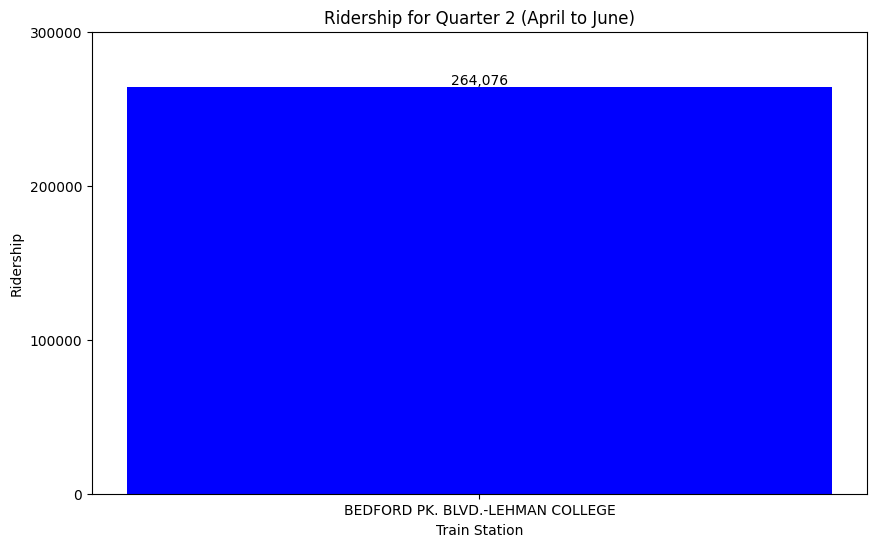

In [34]:
# Make a function to graph
import matplotlib.pyplot as plt

def plot_ridership(stations, ridership):
    """
    Plots a bar graph for ridership data.

    Parameters:
    stations (list): List of station names.
    ridership (list): List of ridership numbers corresponding to the stations.
    """
    # Create bar graph
    plt.figure(figsize=(10, 6))
    bars = plt.bar(stations, ridership, color=['blue', 'green'])

    # Add title and labels
    plt.title('Ridership for Quarter 2 (April to June)')
    plt.xlabel('Train Station')
    plt.ylabel('Ridership')

    # Set Y-axis ticks to count every 100,000
    plt.yticks(range(0, max(ridership) + 100000, 100000))

    # Add exact number of riders at the top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom')

    # Show the plot
    plt.show() 

# Example usage
stations = ['BEDFORD PK. BLVD.-LEHMAN COLLEGE']
ridership = [264076]
plot_ridership(stations, ridership)

In [41]:
def get_total_ridership(station_complex, start_date, end_date, limit = 20000) :
    """
    Fetch total ridership for a given station and date range.
    
    Parameters:
        station_complex (str): The station complex to query.
        start_date (str): The start date for the query (YYYY-MM-DD).
        end_date (str): The end date for the query (YYYY-MM-DD).
        limit (int): The maximum number of records to fetch (default is 50000).
        
    Returns:
        float: The total ridership.
    """
    # Unauthenticated client only works with public datasets
    client = Socrata("data.ny.gov", API_TOKEN)

    # Query to filter data for the specified station and date range
    query = f"station_complex='{station_complex}' AND transit_timestamp >= '{start_date}' AND transit_timestamp <= '{end_date}'"

    # Fetch the filtered data
    results = client.get("wujg-7c2s", where=query, limit=limit)

    # Convert to pandas DataFrame
    results_df = pd.DataFrame.from_records(results)

    # Convert the transit_timestamp to datetime
    results_df['transit_timestamp'] = pd.to_datetime(results_df['transit_timestamp'])

    # Convert ridership to numeric (in case it's not)
    results_df['ridership'] = pd.to_numeric(results_df['ridership'], errors='coerce')

    # Return the sum of the ridership column
    return results_df['ridership'].sum()


# private college
private_college = ["8 St-NYU (R,W)", "116 St-Columbia University (1)"]

# Public College List 
public_college = ["BEDFORD PK. BLVD.-LEHMAN COLLEGE", "President St-Medgar Evers College (2,5)"]


# Get total public college 
public_college_ridership = []

private_college_ridership = []

start = '2024-04-01'
end = '2024-06-30'


ridership = get_total_ridership("8 St-NYU (R,W)", start, end, 50000)
private_college_ridership.append(ridership)

ridership = get_total_ridership("116 St-Columbia University (1)", start, end, 50000)
private_college_ridership.append(ridership)

print(public_college_ridership)



[]
